# this is for analysis of titles for harvard library dataset

In [1]:
#load in data from data_cleaned.csv

import pandas as pd
data = pd.read_csv('data_cleaned.csv')

In [2]:
#load wordcloud, nltk, etc
import numpy as np
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rekaforgo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rekaforgo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data.head()

X                                 title  \
0  0         Painting is a supreme fiction   
1  1          Beat the story-drum, pum-pum   
2  2              preparation of the novel   
3  3  Information through the printed word   
4  4                            green book   

                                            subtitle  \
0                 writings by Jesse Murry, 1980-1993   
1                                                NaN   
2  lecture courses and seminars at the Collège de...   
3                                                NaN   
4                                                NaN   

                                              author publication_date  \
0  [['Murry, Jesse'], ['Earnest, Jarrett'], ['Als...             2021   
1  [['Bryan, Ashley'], ['Ahern, M. M.'], ['Athene...             1980   
2  [['Barthes, Roland'], ['Briggs, Kate'], ['Lég...             2011   
3  [['Machlup, Fritz'], ['Leeson, Kenneth'], ['Le...             1980   
4                                   Qaddafi, Muammar             1980   

  language                                              genre resource_type  \
0  English                            ['text', 'still image']          text   
1  English  ['text', 'still image', 'fairy tales.', 'Fairy...          text   
2  English                                       bibliography          text   
3  English                                       bibliography          text   
4  English                             government publication          text   

   creation_date  
0           2021  
1           1980  
2           2010  
3           1978  
4           1981

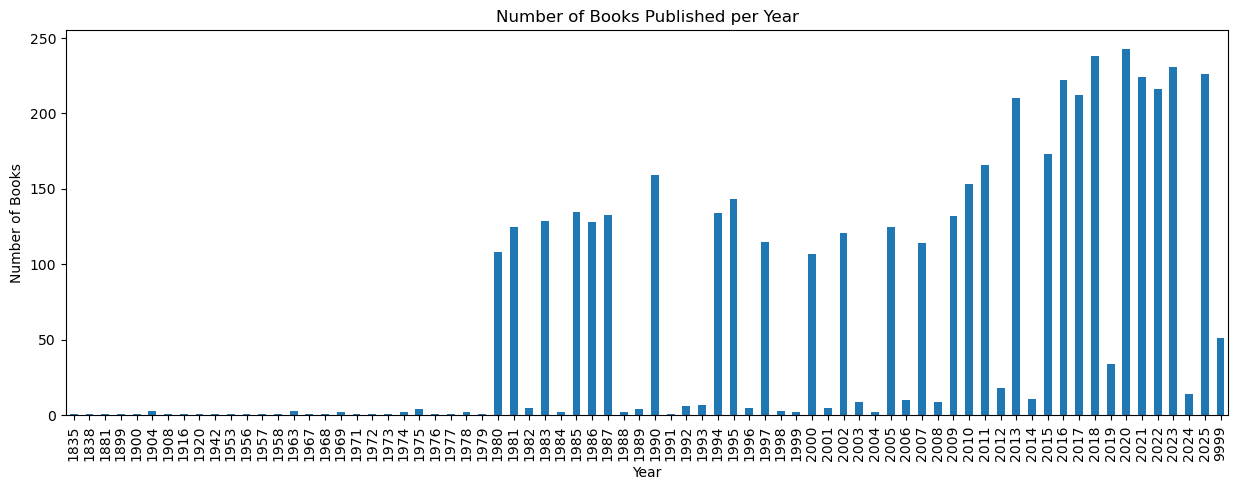

In [4]:

#filter for english language only
data_en = data[data['language'] == 'English']

#convert publication_date to integer + remove rows with non-integer publication_date
data_en = data_en[pd.to_numeric(data_en['publication_date'], errors='coerce').notnull()]

data_en.head()

#count number of books per year
books_per_year = data_en['publication_date'].value_counts().sort_index()
books_per_year.plot(kind='bar', figsize=(15,5), title='Number of Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

#remove below 80 books per year
years_to_keep = books_per_year[books_per_year >= 80].index.astype(int)
data_en = data_en[data_en['publication_date'].astype(int).isin(years_to_keep)]

In [5]:
# create a list of titles per year from 1980 - 2024
titles_by_year = {}

for year in range(1980, 2025):
    titles = data_en[data_en['publication_date'].astype(int) == year]['title'].tolist()
    titles_by_year[year] = ' '.join(titles)

#print(titles_by_year[1980])  # Example output for year 1980

In [6]:
#expand stopwords by adding some
additional_stopwords = {'book', 'edition', 'volume', 'series', 's', "books"}

stop_words = set(stopwords.words('english')).union(additional_stopwords)

In [7]:
#generate tokens and remove stopwords

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[’']", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    tokens = word_tokenize(text)

    # filter stopwords + remove single-character tokens
    tokens = [
        t for t in tokens
        if t not in stop_words and len(t) > 1
    ]

    return " ".join(tokens)



filtered_titles_by_year = {year: preprocess_text(titles) for year, titles in titles_by_year.items()}


print(filtered_titles_by_year[1980])  # Example output for year 1980

beat story drum pum pum information printed word green essays medieval culture bookbinding reader text reasoning discrimination economic crisis american society autobiography human resources japanese industrial development kierkegaards relation hegel landlords tenants imperial rome directory publishers printers sellers caribbean community american national standard numbering basic mass media political theory political education demand functions slutsky matrix psme letters edward fitzgerald interpretation essay philosophy literary criticism life fiction ford madox ford three british revolutions war rural life early modern low countries tamil temple myths cabanis female labor supply ugo foscolo poet exile education equality japan businessmen politics rhineland tokutomi soho journalist modern japan play comedy culture modern japanese prose poem end russian imperial army modern school movement identity essence social order limits law power knowledge repro memento ambassador macveagh report

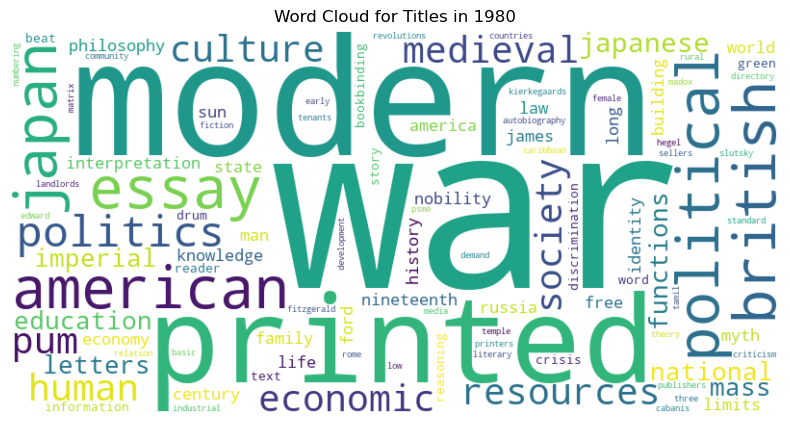

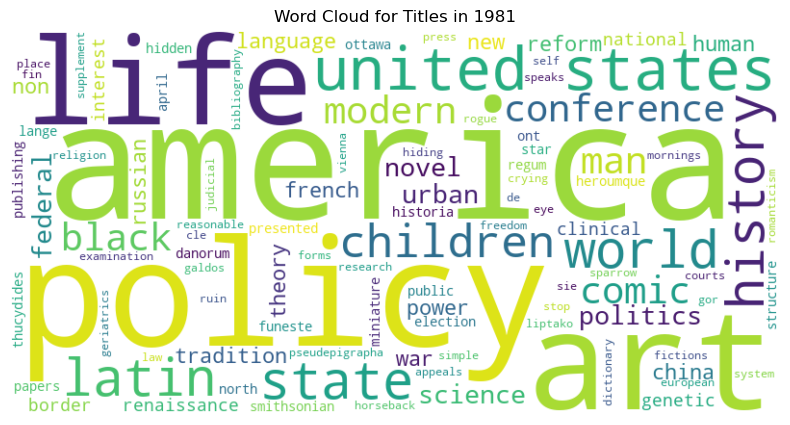

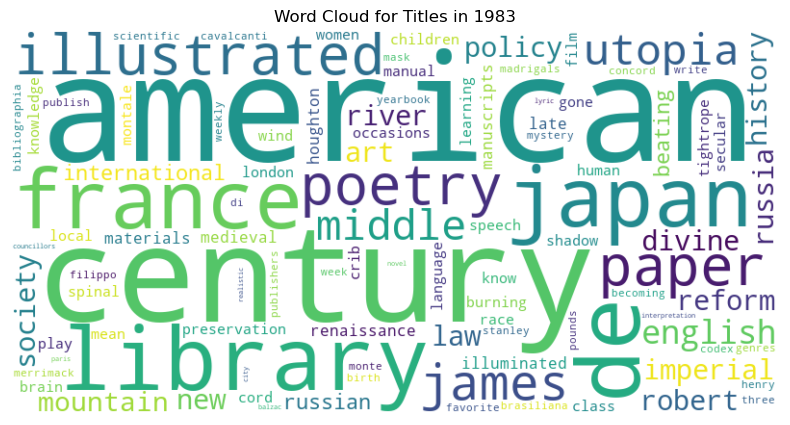

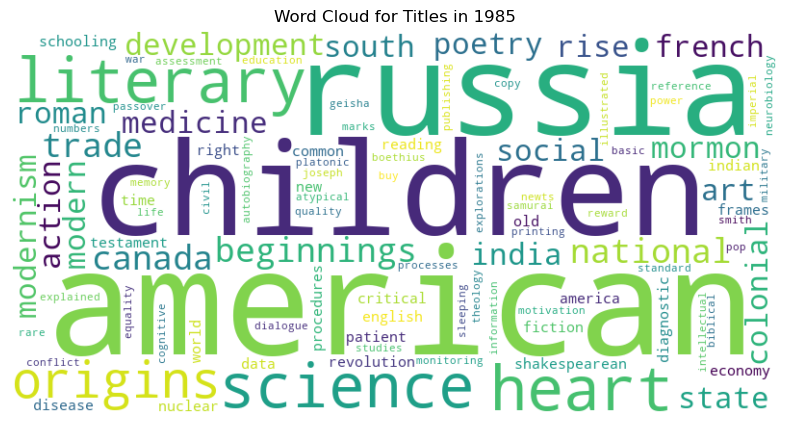

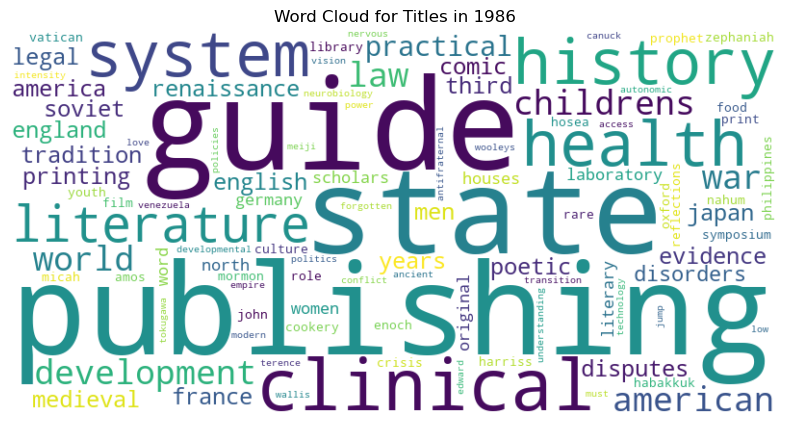

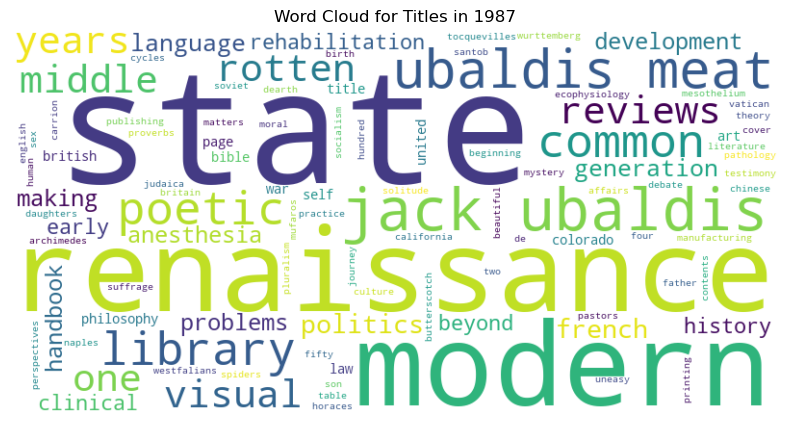

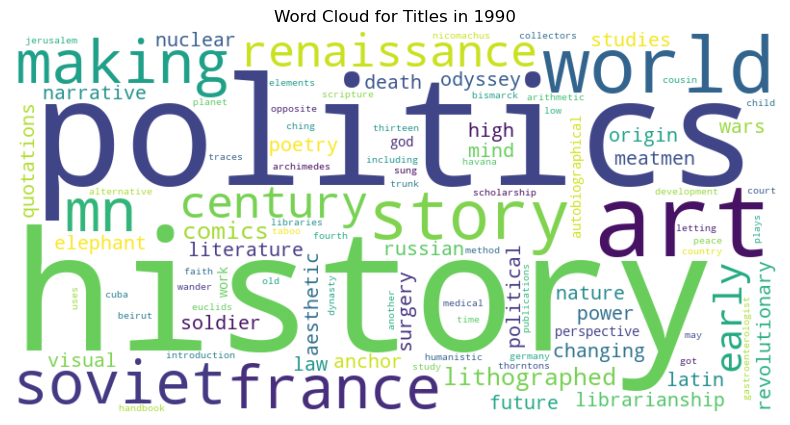

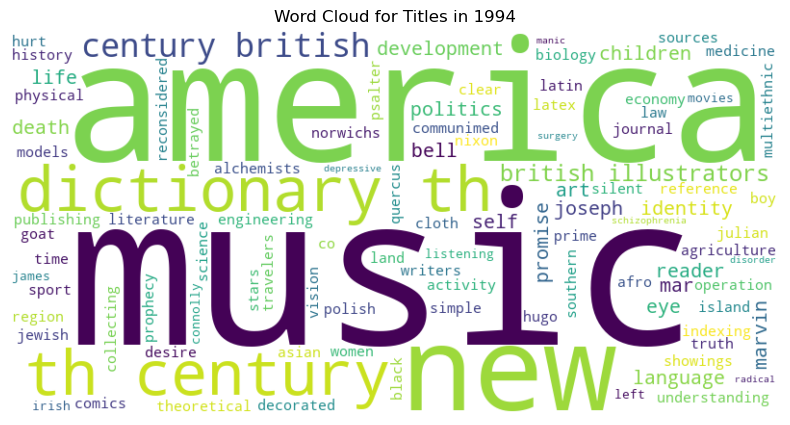

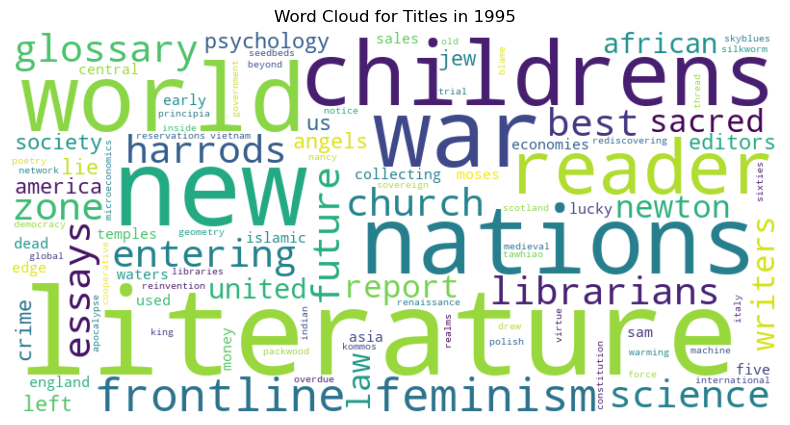

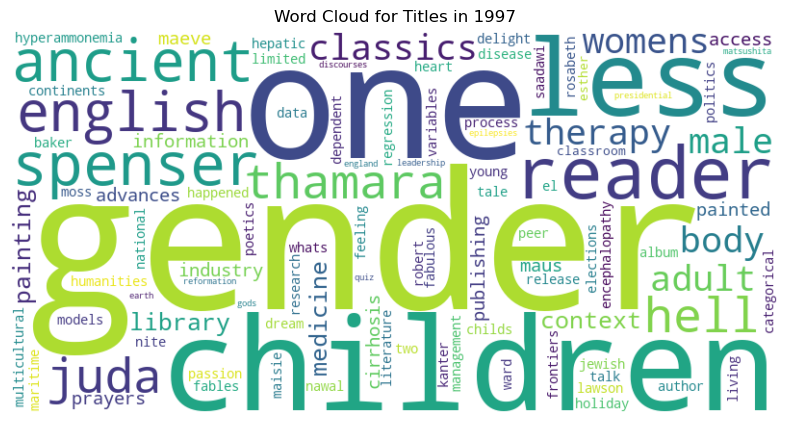

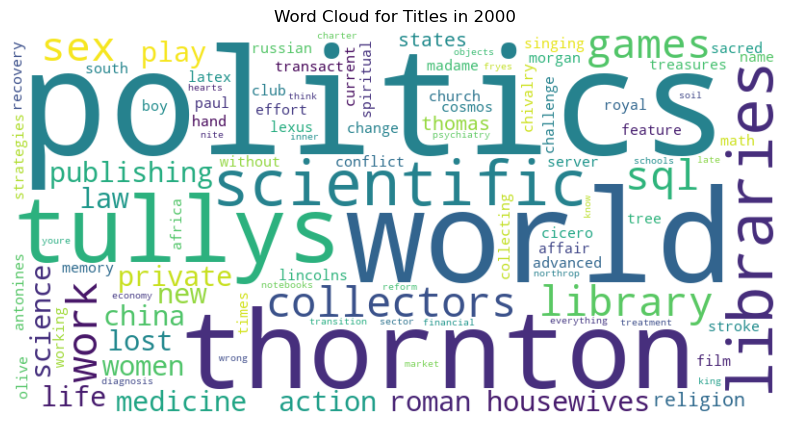

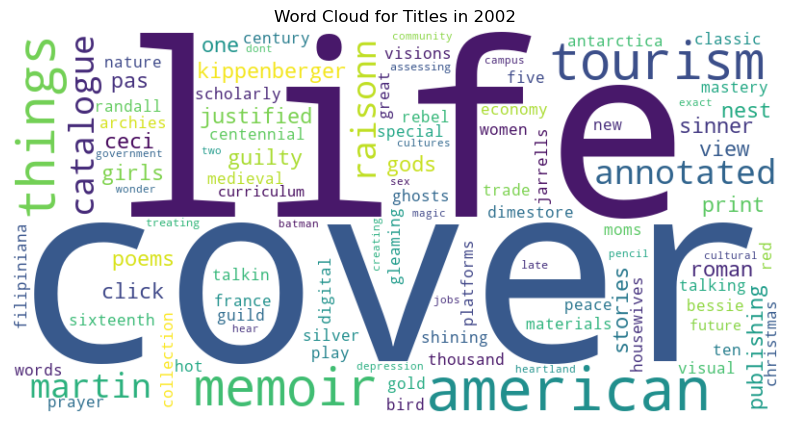

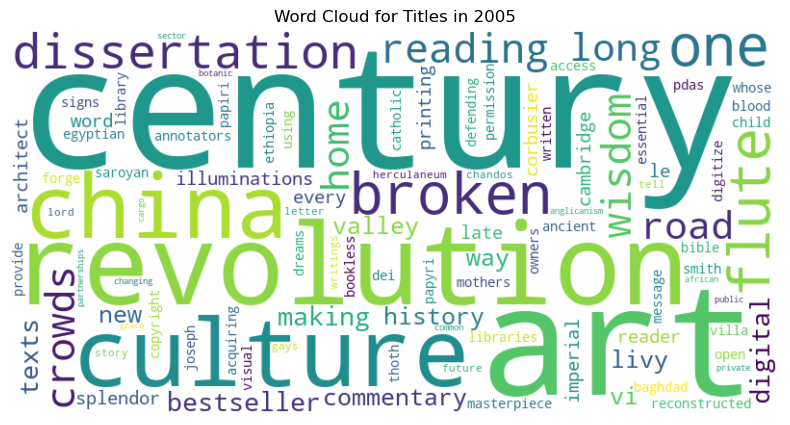

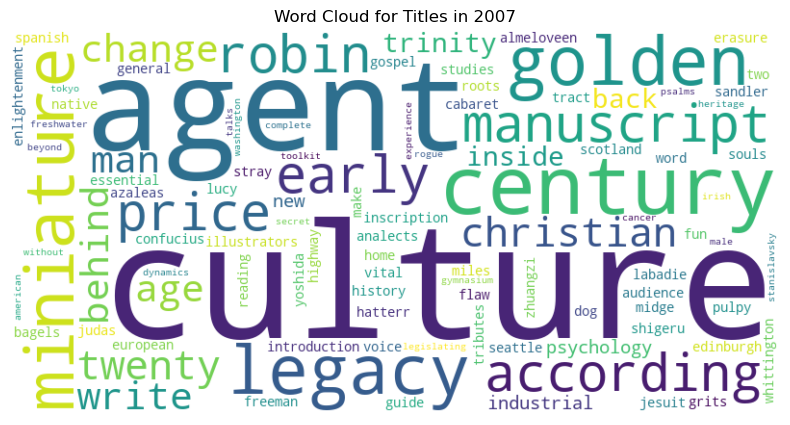

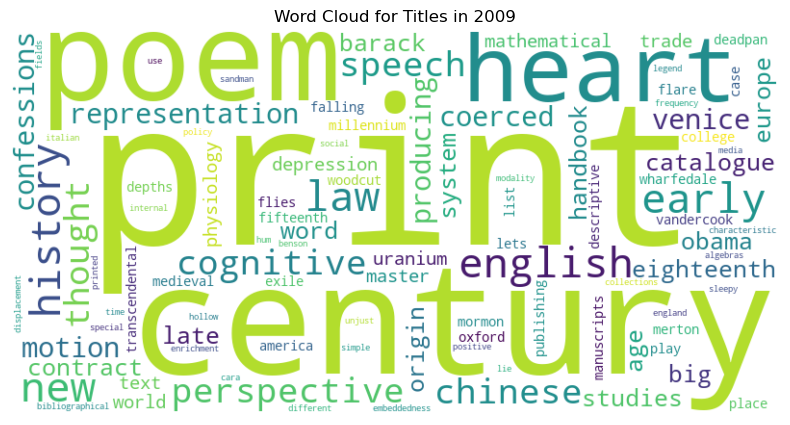

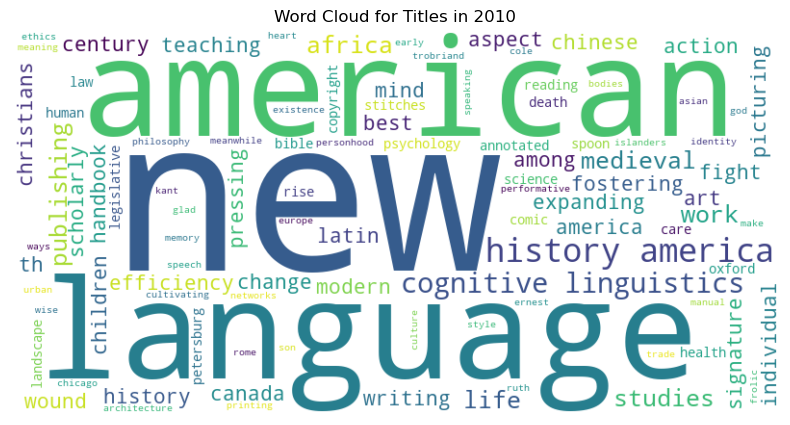

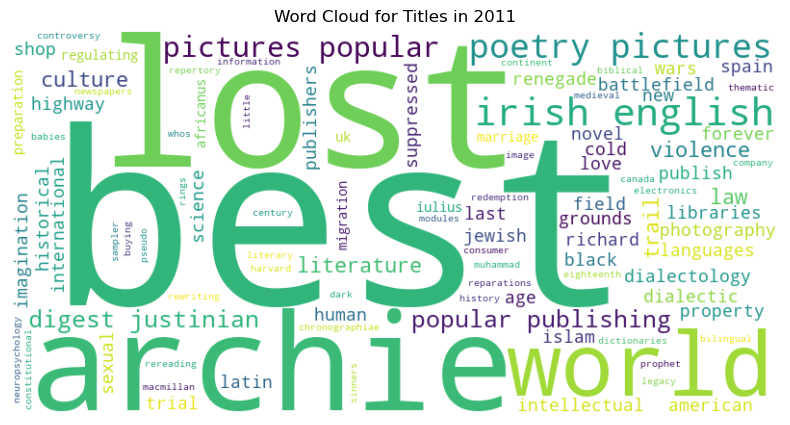

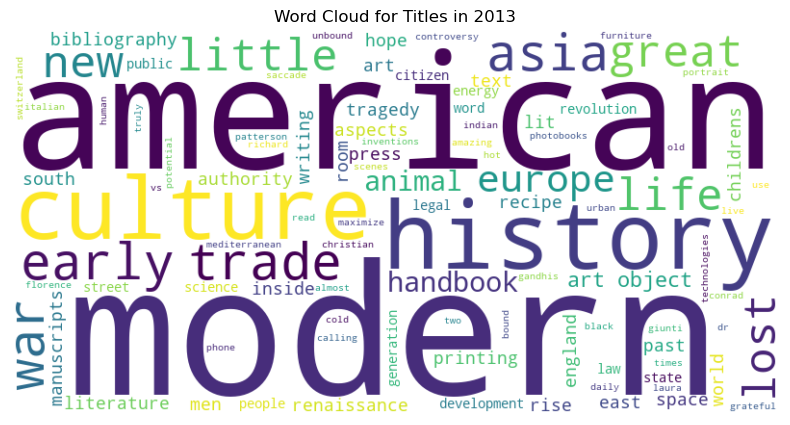

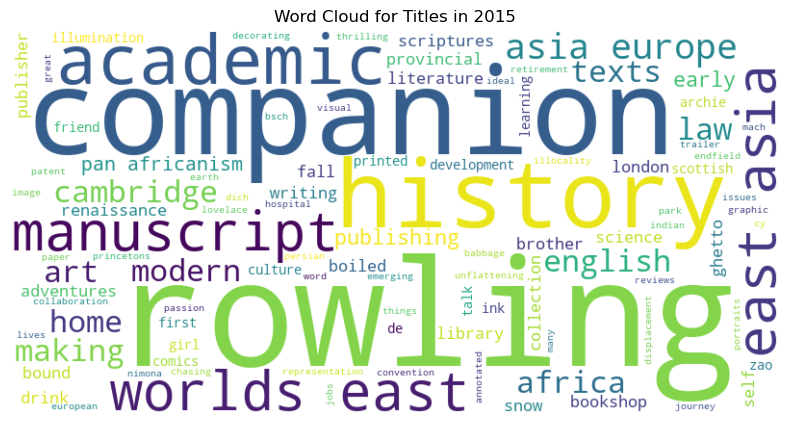

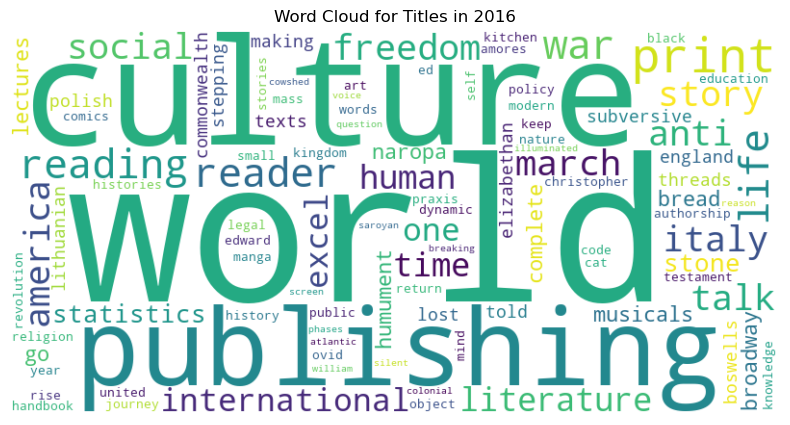

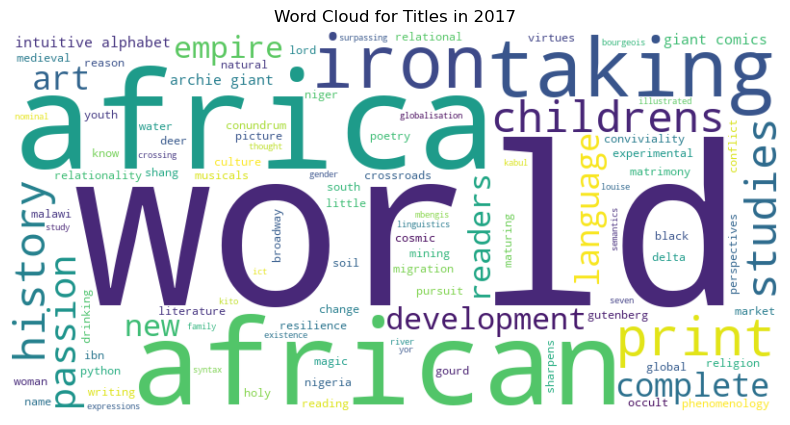

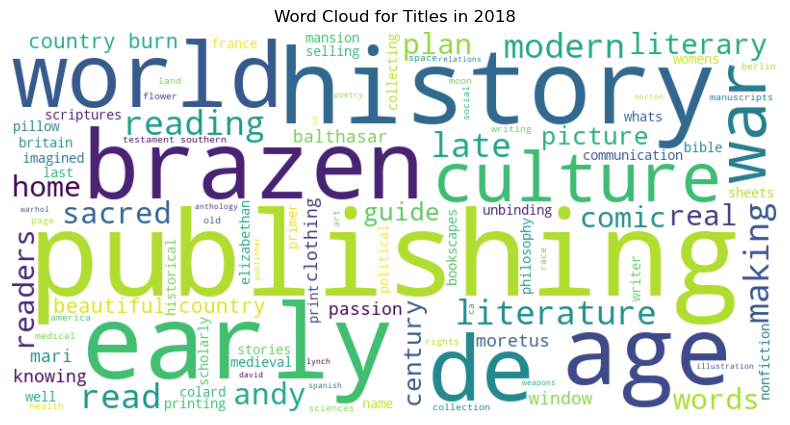

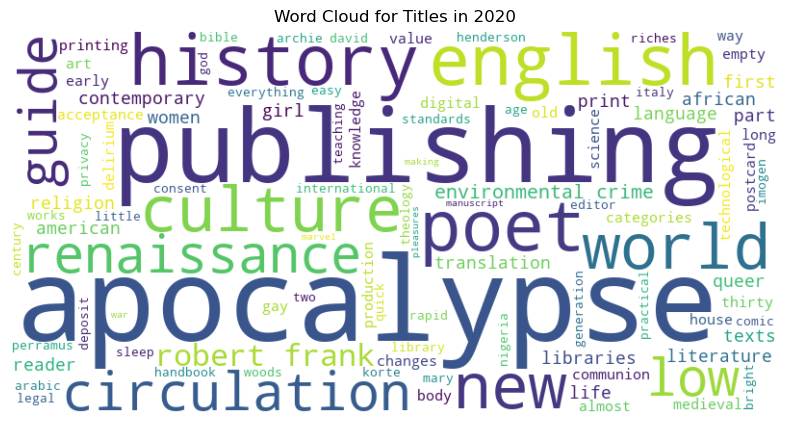

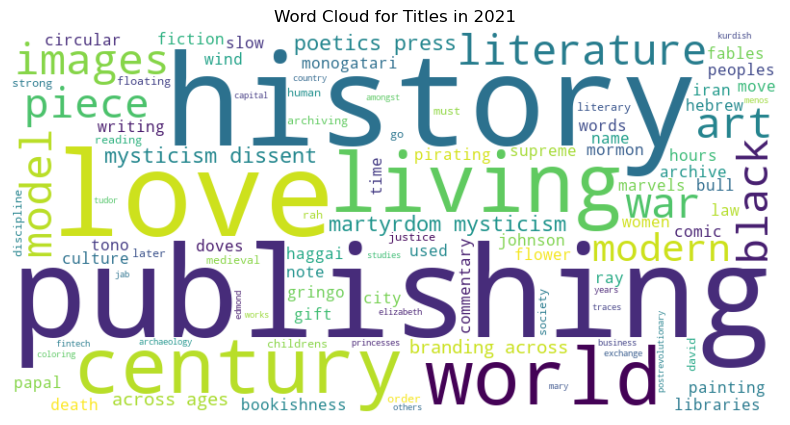

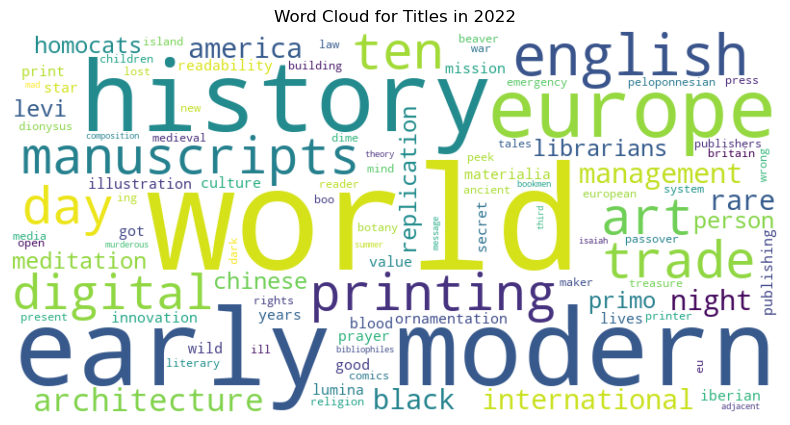

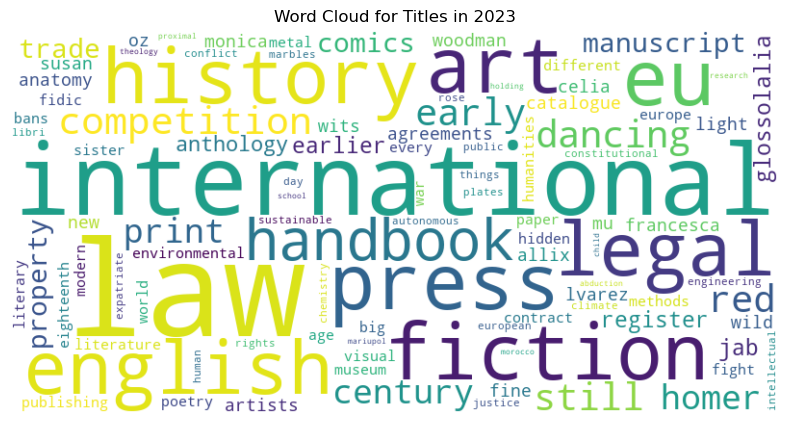

In [8]:
#print wordcloud for each year
#skip if na

os.makedirs("wordclouds", exist_ok=True)

for year, text in filtered_titles_by_year.items():
    if not text:
        continue
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          max_words=100, colormap='viridis', margin=5).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Titles in {year}')
    plt.savefig(f"wordclouds/wordcloud_{year}.png", bbox_inches='tight')
    plt.show()
    plt.close()